In [2]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division
import cdf

hf = 0.7
xlabelpad = 3

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\weakest-two-distriplot
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\weakest-two-distriplot
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


In [3]:
def plot_fig(ax,dist, len_x, **kwargs):
    minima = np.amin(dist, axis=0)

    dist = dist.flatten()
    dist.sort()

    minima_over = np.tile(np.nan, len_x)
    
    for i in range(len_x):
        minima_over[i] = np.sum(minima > dist[i])

    xvals = np.arange(len_x)/n_systems
    ax.plot(xvals, minima_over/n_systems, **kwargs) #label="uniform",color="black", lw=0.5)

In [195]:
xlabelpad = -1

In [22]:
lowest_per_system = np.amin(dist, axis=1)
lowest_per_system.shape

(2230,)

\includegraphics{notebooks/weakest-two-distriplot/synthetic-from-N1024-P1e-2.pdf}
0.000131518148551 0.000144045952104 1.09525532172


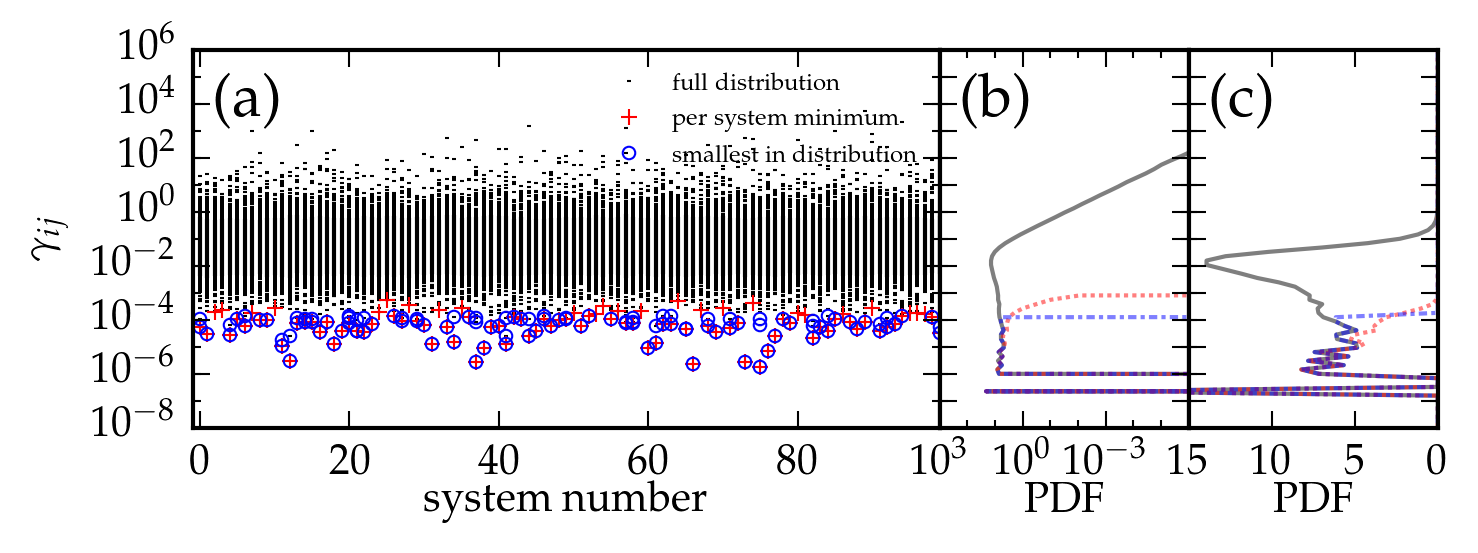

In [208]:
numpy.random.seed(1337)

gammas = np.load(r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2-gammas.npy") * 2
gammas = gammas[gammas<1e9] # negative values are wrapped to 1e10, filter those out

system_size = 1147
n_systems = 1000
xvals = linspace(0,6)
len_x = int(max(xvals) * n_systems)

nsyst = 100

dist = np.random.choice(gammas, size=(n_systems, system_size))
lowest_per_system = np.amin(dist, axis=1)

lowest_per_system_nsyst = lowest_per_system[:nsyst]
lowest_per_system_x = np.arange(nsyst)

lowest = np.sort(dist.flatten())[:n_systems]
lowest_cap = np.amax(lowest)
lowest_nsyst_x = np.where(dist <= lowest_cap)[0]
lowest_nsyst = dist[dist <= lowest_cap]
msk = lowest_nsyst_x < nsyst
lowest_nsyst_x = lowest_nsyst_x[msk]
lowest_nsyst = lowest_nsyst[msk]

import matplotlib.gridspec as gridspec

f = fullfig(hf=hf)

gs1 = gridspec.GridSpec(1, 5)
gs1.update(wspace=0)
ax1 = plt.subplot(gs1[0,:3])
ax2 = plt.subplot(gs1[0,3])
ax3 = plt.subplot(gs1[0,4])

for ax in [ax1,ax2,ax3]:
    ax.set_yscale('log')
    ax.set_ylim(1e-8, 1e6)

for ax in [ax2,ax3]:
    ax.set_yticklabels([])

ax1.set_xlabel(r"system number", labelpad=xlabelpad)
ax1.set_ylabel(r"$\gamma_{ij}$")
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks( [10**i for i in range(-8,7,2)])

if True:
    for i,row in enumerate(dist[:nsyst]):
        r = row[row<1e9] # remove negative breaking strains (indicated w/ 1e10)
        llow,low,mid,high,hhigh = np.percentile(r, [5,25,50,75,95])
        ax1.plot([i,i], [llow,hhigh], "k", lw=1)

        lower = r[r<llow]
        ax1.plot(np.ones_like(lower) * i, lower, "k_", ms=1)

        higher = r[r>hhigh]
        ax1.plot(np.ones_like(higher) * i, higher, "k_", ms=1)
else:
    for i,system in enumerate(dist[:nsyst]):
        ax1.plot(np.ones_like(system) * i, system, "k_", ms=1)

ax1.plot(lowest_per_system_x, lowest_per_system_nsyst, "r+", ms=4)
ax1.plot(lowest_nsyst_x, lowest_nsyst, "o", color="None", mec="blue",
         ms=3)

ax1.plot(-1,-1,"k_",ms=1,label="full distribution")
ax1.plot(-1,-1,"r+", ms=4,label="per system minimum")
ax1.plot(-1,-1,"o", ms=3,color="None", mec="blue",label="smallest in distribution")

ax1.legend(loc='upper right', frameon=False, fontsize='xx-small', numpoints=1)

ax2.set_xlabel("PDF", labelpad=xlabelpad)
ax2.set_xscale('log')
ax2.set_xlim(1e3,1e-6)
ax2.set_xticks([1e3,1e0,1e-3])
ax2.set_xticks([1e2,1e1,1e-1,1e-2,1e-4,1e-5], minor=True)



ax3.set_xlabel("PDF", labelpad=xlabelpad)
ax3.set_xlim(15,0)
ax3.set_xticks([15,10,5,0])

bins = np.logspace(-9,7,100)
binsize = bins[1:] - bins[:-1]

N_elements = n_systems * system_size
pdf_all, _ = np.histogram(dist.flatten(), bins=bins)
pdf_all = pdf_all / (N_elements * binsize)
pdf_per_system, _ = np.histogram(lowest_per_system, bins=bins)
pdf_per_system = pdf_per_system / (N_elements * binsize)
pdf_lowest, _ = np.histogram(lowest, bins=bins)
pdf_lowest = pdf_lowest / (N_elements * binsize)
    
#pdf_all, _ = np.histogram(dist.flatten(), bins=bins, density=True)
#pdf_per_system, _ = np.histogram(lowest_per_system, bins=bins, density=True)
#pdf_lowest, _ = np.histogram(lowest, bins=bins, density=True)

xijvals = 0.5*(bins[:-1] + bins[1:])

for ax in [ax2, ax3]:
    ax.plot(pdf_all, xijvals, color='black', alpha=0.5)
    ax.plot(pdf_per_system, xijvals, color='red', alpha=0.5, dashes=[1,1])
    ax.plot(pdf_lowest, xijvals, color='blue', alpha=0.5, dashes=[1,1,2,1])

subplotlabel("(a)", ax=ax1)
subplotlabel("(b)", ax=ax2)
subplotlabel("(c)", ax=ax3)

savefig('synthetic-from-N1024-P1e-2.pdf')

print np.mean(lowest_per_system), np.amax(lowest), np.amax(lowest)/np.mean(lowest_per_system)

In [23]:
import glob
for d in [r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-2",
          r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-6",
          r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2",
          r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-6"
         ]:
    lp = d.split('\\')[-1]
    N,P = lp.split("~")
    N = int(N[1:])
    P = float(P[1] + "." + P[2:])

    pathname = os.path.split(d)[1]
    allgammas = []
    alldeltas = []
    allupars = []
    alluperps = []

    
    msk = (dataN == N) * (datalP == np.round(np.log10(P),2))
    nums = summ[msk]["num"] 

    for i,num in enumerate(nums):
        f = d + "/%04i.npy" % num
        os.write(1, f + "\n")
        try:
            x=np.load(f)
        except IOError as e:
            os.write(2, str(e) + "\n")
            continue
                
        up = x.tolist()['u_par']
        upp = x.tolist()['u_perp']
        delta = x.tolist()['deltas']

        gammas = delta / up
        mask = ((delta > 0) *                               # only contacts
                np.isfinite(up) *                          # this should be rare, but will mess up analysis
                np.isfinite(gammas) * (np.abs(gammas) > 1e-14) *   # rattlers
                np.tril(np.ones_like(delta, dtype=np.bool)) # only lower triangular matrix (otherwise we duplicate values)
        )

        allupars.append(up[mask])
        alluperps.append(upp[mask])
        alldeltas.append(delta[mask])
        allgammas.append(gammas[mask])

    import pickle
    pickle.dump(allupars, open(d + "/allupars.pickle", "wb"), protocol=2)
    pickle.dump(alluperps, open(d + "/alluperps.pickle", "wb"), protocol=2)
    pickle.dump(alldeltas, open(d + "/alldeltas.pickle", "wb"), protocol=2)
    pickle.dump(allgammas, open(d + "/allgammas.pickle", "wb"), protocol=2)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:38: RuntimeWarning: invalid value encountered in absolute
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:38: RuntimeWarning: invalid value encountered in greater
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:35: RuntimeWarning: invalid value encountered in true_divide


In [205]:
def doplot(d,yticks,ylim,pdflim,pdfticks,pdflinlim,pdflinticks,bins,
           pdflinticklabels=None,
           simplify=False,
           pdflinxlabel="PDF",
          subplotlabels='abc',
          tussenticks=[],ytussenticks=[]):
    naam = os.path.split(d)[-1]
    allupars = alluperps = alldeltas = allgammas = None
    allgammas = pickle.load(open(d + "/allgammas.pickle", "rb"))  # nb. LIST not ARRAY
    
    #print len(allgammas), np.mean([len(x) for x in allgammas]), np.mean([np.amin(x[x>0]) for x in allgammas])

    # reshape allgammas in een array met nan waar geen contact is
    posgammas = np.tile(np.nan, (len(allgammas), np.amax([len([y for y in x if y>0]) for x in allgammas])))
    for i, row in enumerate(allgammas):
        data = row[row>0]
        data = data * 2
        posgammas[i,:len(data)] = data
    del allgammas
    
    print i, np.mean(np.sum(~np.isnan(posgammas), axis=1)), np.mean(np.nanmin(posgammas, axis=1))

    nsyst = 100
    n_systems = len(posgammas)

    lowest_per_system = np.nanmin(posgammas, axis=1)
    lowest_per_system_nsyst = lowest_per_system[:nsyst]
    lowest_per_system_x = np.arange(nsyst)

    sgammas = np.sort(posgammas[np.isfinite(posgammas)])
    lowest = sgammas[sgammas>0][:n_systems]

    lowest_nsyst_x = []
    lowest_nsyst = []

    for i, row in enumerate(posgammas[:nsyst]):
        lids, rids = np.where(row == lowest[:,np.newaxis])
        for j in rids:
            lowest_nsyst_x.append(i)
            lowest_nsyst.append(row[j])

    import matplotlib.gridspec as gridspec

    f = fullfig(hf=hf)

    gs1 = gridspec.GridSpec(1, 5)
    gs1.update(wspace=0)
    ax1 = plt.subplot(gs1[0,:3])
    ax2 = plt.subplot(gs1[0,3])
    ax3 = plt.subplot(gs1[0,4])

    for ax in [ax1,ax2,ax3]:
        ax.set_yscale('log')
        ax.set_ylim(*ylim)
        ax.set_yticks(yticks)
        ax.set_yticks(ytussenticks, minor=True)

    for ax in [ax2, ax3]:
        ax.set_yticklabels([])

    ax1.set_xlabel(r"system number", labelpad=xlabelpad)
    ax1.set_ylabel(r"$\gamma_{ij}$")
    ax1.set_xticks([0,20,40,60,80])

    for i,row in enumerate(posgammas[:nsyst]):
        r = row[row>0]
        
        if simplify:
            llow,low,mid,high,hhigh = np.percentile(r, [5,25,50,75,95])
            ax1.plot([i,i], [llow,hhigh], "k", lw=1)
            #ax1.plot([i,i], [llow,low], 'b', lw=1)
            #ax1.plot([i,i], [high,hhigh], 'b', lw=1)
            #ax1.plot([i,i], [low,high], 'b', lw=2)

            lower = r[r<llow]
            ax1.plot(np.ones_like(lower) * i, lower, "k_", ms=1)

            higher = r[r>hhigh]
            ax1.plot(np.ones_like(higher) * i, higher, "k_", ms=1)
        else:
            ax1.plot(np.ones_like(r) * i, r, "k_", ms=1)

    ax1.set_xlim(-1, nsyst+1)

    ax1.plot(lowest_per_system_x, lowest_per_system_nsyst, "r+", ms=4)
    ax1.plot(lowest_nsyst_x, lowest_nsyst, "o", color="None", mec="blue",
             ms=3)

    ax1.plot(-1,-1,"k_",ms=1,label="full distribution")
    ax1.plot(-1,-1,"r+", ms=4,label="per system minimum")
    ax1.plot(-1,-1,"o", ms=3,color="None", mec="blue",label="smallest in distribution")

    ax1.legend(loc='upper right', frameon=False, fontsize='xx-small', numpoints=1)

    
    ax2.set_xscale('log')
    ax2.set_xlim(*pdflim)
    ax2.set_xticks(pdfticks)
    ax2.set_xticks(tussenticks, minor=True)
    
    
    ax3.set_xlim(*pdflinlim)
    ax3.set_xticks(pdflinticks)
    if pdflinticklabels is not None:
        ax3.set_xticklabels(pdflinticklabels)

    ax2.set_xlabel("PDF", labelpad=xlabelpad)
    ax3.set_xlabel(pdflinxlabel, labelpad=xlabelpad)
        
    binsize = bins[1:] - bins[:-1]

    pdf_all, _ = np.histogram(sgammas, bins=bins)
    pdf_all = pdf_all / (N_elements * binsize)
    pdf_per_system, _ = np.histogram(lowest_per_system, bins=bins)
    pdf_per_system = pdf_per_system / (N_elements * binsize)
    pdf_lowest, _ = np.histogram(lowest, bins=bins)
    pdf_lowest = pdf_lowest / (N_elements * binsize)

    xijvals = 0.5*(bins[:-1] + bins[1:])

    for ax in [ax2, ax3]:
        ax.plot(pdf_all, xijvals, color='black', alpha=0.5)
        ax.plot(pdf_per_system, xijvals, color='red', alpha=0.5, dashes=[1,1])
        ax.plot(pdf_lowest, xijvals, color='blue', alpha=0.5, dashes=[1,1,2,1])

    for ax,l in zip([ax1,ax2,ax3], subplotlabels):
        subplotlabel("(" + l + ")", ax=ax)
    
    savefig(naam.replace("~", "-") + '-scatter-hist.pdf')
    
    print "gammabklr   gammabkdist  gammabkdist/gammabklr"
    print "%.3e %.3e %.3f" % (np.mean(lowest_per_system), np.amax(lowest), np.amax(lowest)/np.mean(lowest_per_system))
    
    return posgammas

1034 1147.29275362 0.000151334541951
\includegraphics{notebooks/weakest-two-distriplot/N1024-P1e-2-scatter-hist.pdf}
gammabklr   gammabkdist  gammabkdist/gammabklr
1.513e-04 1.409e-04 0.931


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:66: RuntimeWarning: invalid value encountered in greater


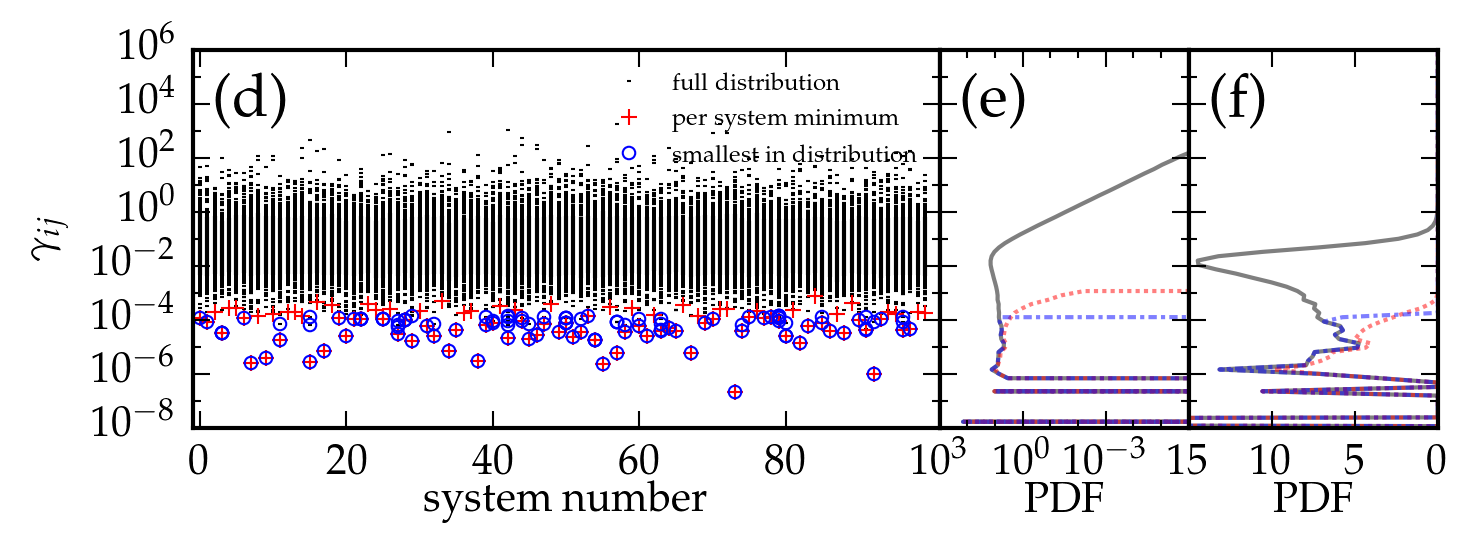

In [206]:
d = r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2"
yticks = [10**i for i in range(-8,7,2)]
ytussenticks = [10**i for i in range(-7,6,2)]
ylim = (1e-8, 1e6)
pdflim = (1e3,1e-6)
pdfticks = [1e3,1e0,1e-3]
tussenticks = [1e2,1e1,1e-1,1e-2,1e-4,1e-5]
pdflinlim = (15,0)
pdflinticks = [15,10,5,0]

bins = np.logspace(np.log10(ylim[0])-1, np.log10(ylim[1])+1,100)

posgammas = doplot(d,yticks,ylim,pdflim,pdfticks,pdflinlim,pdflinticks,bins,simplify=True,subplotlabels='def',tussenticks=tussenticks,ytussenticks=ytussenticks)

In [169]:
import cdf
N = 1024; lP = -2
mask = (dataN == N) * (datalP == lP) #* (summ["N-_plus"] > 0) * (summ["N+_plus"] == 0)
sdata = summ[mask]

"%e" % np.mean(sdata["gbk_SL_base"])

'1.458792e-04'

In [140]:
sgammas.shape

(1187448,)

1980 16.0989399293 1.60767617335e-06
\includegraphics{notebooks/weakest-two-distriplot/N16-P1e-6-scatter-hist.pdf}
gammabklr   gammabkdist  gammabkdist/gammabklr
1.608e-06 1.136e-06 0.707


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:66: RuntimeWarning: invalid value encountered in greater


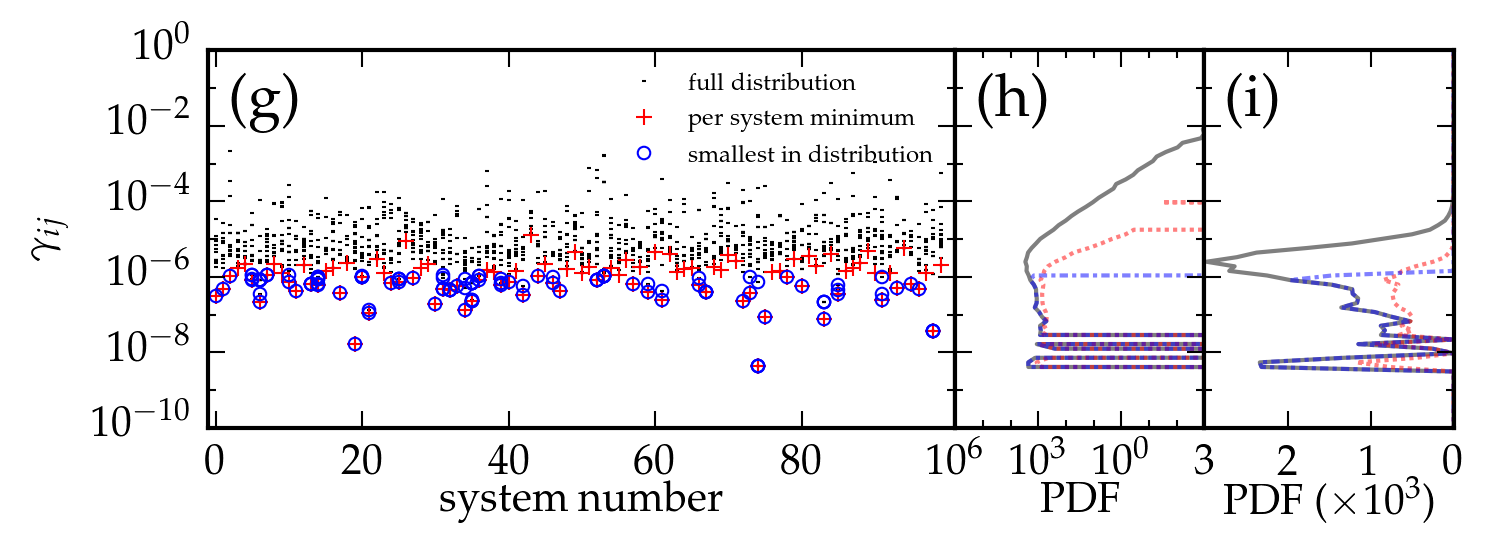

In [207]:
d = r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-6"
yticks = [10**i for i in range(-10,1,2)]
ylim = (1e-10, 1e0)
ytussenticks = [1e-9,1e-7,1e-5,1e-3,1e-1]
pdflim = (1e6,1e-3)
pdfticks = [1e6,1e3,1e0]
tussenticks = [1e5,1e4,1e2,1e1,1e-1,1e-2]
pdflinlim = (3000,0)
pdflinticks = [3000,2000,1000,0]
pdflinticklabels = ["3", "2", "1", "0"]
pdflinxlabel = r"PDF ($\times 10^3$)"

bins = np.logspace(np.log10(ylim[0])-1, np.log10(ylim[1])+1,100)

doplot(d,yticks,ylim,pdflim,pdfticks,pdflinlim,pdflinticks,bins,pdflinticklabels=pdflinticklabels,pdflinxlabel=pdflinxlabel,simplify=False,subplotlabels='ghi',tussenticks=tussenticks,ytussenticks=ytussenticks)

pass